In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
features = pd.read_csv('data.csv')
features.head(5)

Saving data.csv to data (1).csv


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [2]:
print(features.columns)
features.describe()

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [3]:
features = pd.get_dummies(features)
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,45.9,40,44,48,46,53,False,True,False,False,False,False,False
4,46.0,44,46,46,46,41,False,False,False,False,False,True,False


In [4]:
import numpy as np
labels = np.array(features['actual'])
print(labels)

features= features.drop('actual', axis = 1)

feature_list = list(features.columns)

features = np.array(features)

[45 44 41 40 44 51 45 48 50 52 45 49 55 49 48 54 50 54 48 52 52 57 48 51
 54 56 57 56 52 48 47 46 51 49 49 53 49 51 57 62 56 55 58 55 56 57 53 51
 53 51 51 60 59 61 60 57 53 58 55 59 57 64 60 53 54 55 56 55 52 54 49 51
 53 58 63 61 55 56 57 53 54 57 59 51 56 64 68 73 71 63 69 60 57 68 77 76
 66 59 58 60 59 59 60 68 77 89 81 81 73 64 65 55 59 60 61 64 61 68 77 87
 74 60 68 77 82 63 67 75 81 77 82 65 57 60 71 64 63 66 59 66 65 66 66 65
 64 64 64 71 79 75 71 80 81 92 86 85 67 65 67 65 70 66 60 67 71 67 65 70
 76 73 75 68 69 71 78 85 79 74 73 76 76 71 68 69 76 68 74 71 74 74 77 75
 77 76 72 80 73 78 82 81 71 75 80 85 79 83 85 88 76 73 77 73 75 80 79 72
 72 73 72 76 80 87 90 83 84 81 79 75 70 67 68 68 68 67 72 74 77 70 74 75
 79 71 75 68 69 71 67 68 67 64 67 76 77 69 68 66 67 63 65 61 63 66 63 64
 68 57 60 62 66 60 60 62 60 60 61 58 62 59 62 62 61 65 58 60 65 68 59 57
 57 65 65 58 61 63 71 65 64 63 59 55 57 55 50 52 55 57 55 54 54 49 52 52
 53 48 52 52 52 46 50 49 46 40 42 40 41 36 44 44 43

In [5]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


In [6]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [7]:
predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3.87


In [8]:
mape = 100 * (errors / test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.


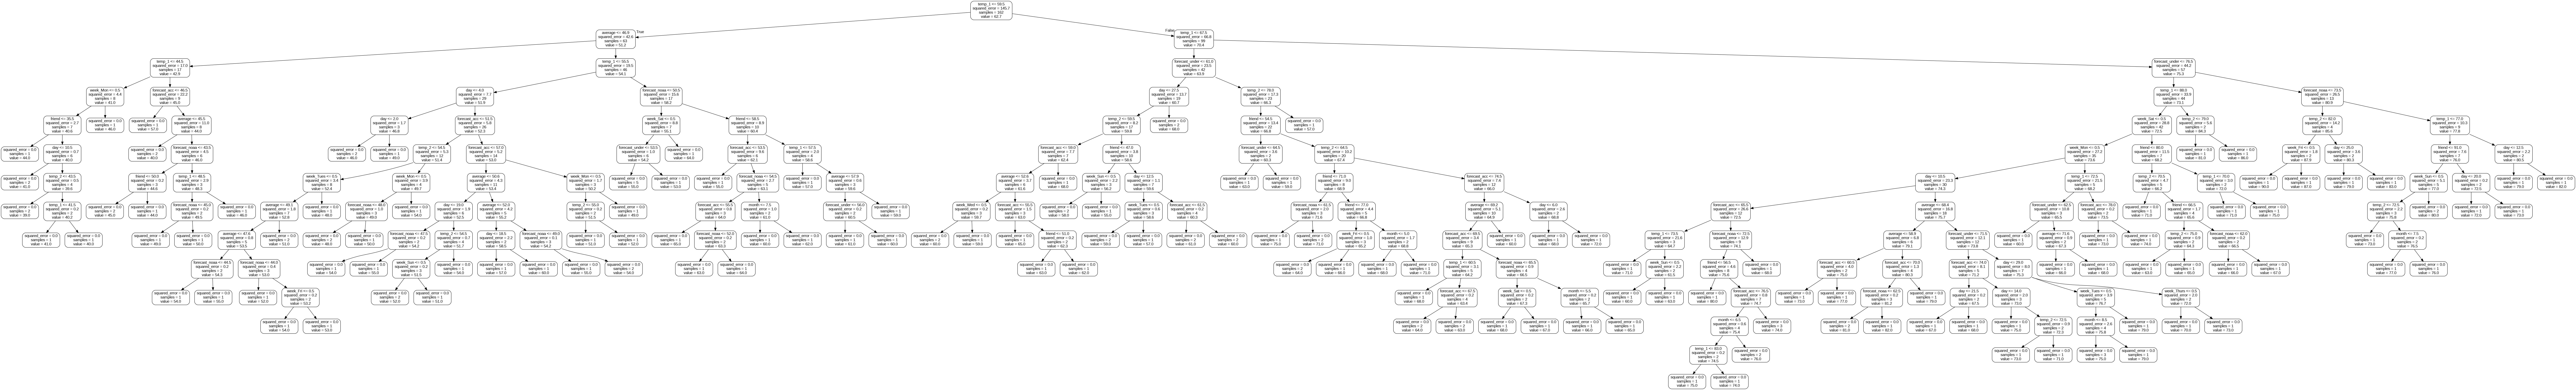

In [9]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image, display

tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('tree.png')
display(Image('tree.png'))

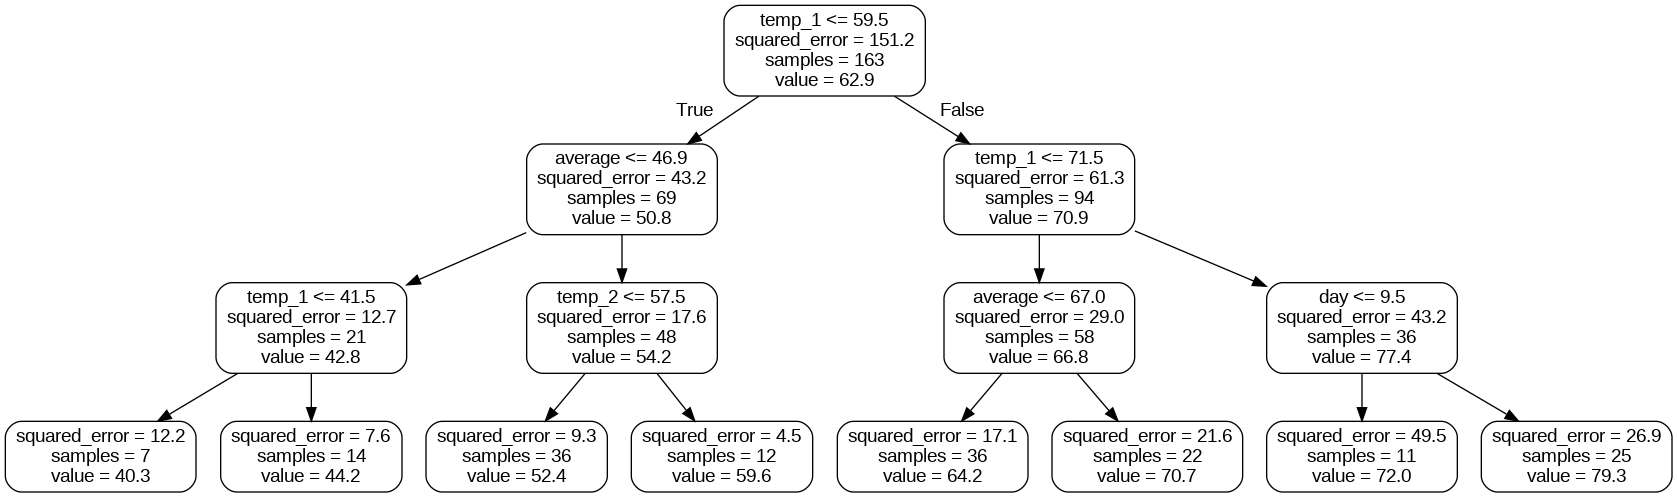

In [10]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

from IPython.display import Image, display
display(Image('small_tree.png'))

In [11]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


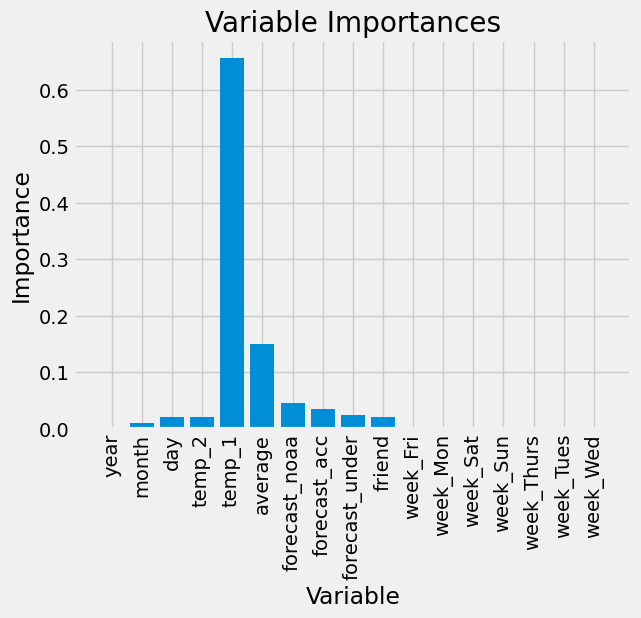

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [13]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

rf_most_important.fit(train_important, train_labels)
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.
